In [49]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

In [50]:
#pd.Series(range(3), index=pd.date_range(start="2000", freq="D", periods=3))

In [51]:
#a=pd.Series(pd.date_range("2000-1-31", freq="Y", periods=3))
#a

In [52]:
# Load the data
data = pd.read_csv('/Users/jarkrunglerdkriangkrai/ISE/Year 4/Semester 2/Big Data/new_github/big_data_ai/HW6_PRSA_Data_Tiantan.csv')

In [53]:
# Datetime
data['datetime']=data['year'].astype(str).str.cat([data['month'].astype(str),data['day'].astype(str),data['hour'].astype(str)], sep='-')

In [54]:
# Convert the 'date' column to a datetime object
data['datetime'] = pd.to_datetime(data['datetime'],format='%Y-%m-%d-%H')
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan,2017-02-28 19:00:00
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan,2017-02-28 20:00:00
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan,2017-02-28 21:00:00
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan,2017-02-28 22:00:00


In [55]:
# Set the 'date' column as the index
data = data.set_index('datetime')

data = data.resample('D').mean().round(2)


In [56]:
data = data[["PRES"]]
data

,PRES
datetime,
2013-03-01,1028.78
2013-03-02,1028.85
2013-03-03,1016.46
2013-03-04,1019.45
2013-03-05,1012.70
...,...
2017-02-24,1021.01
2017-02-25,1018.81
2017-02-26,1020.34


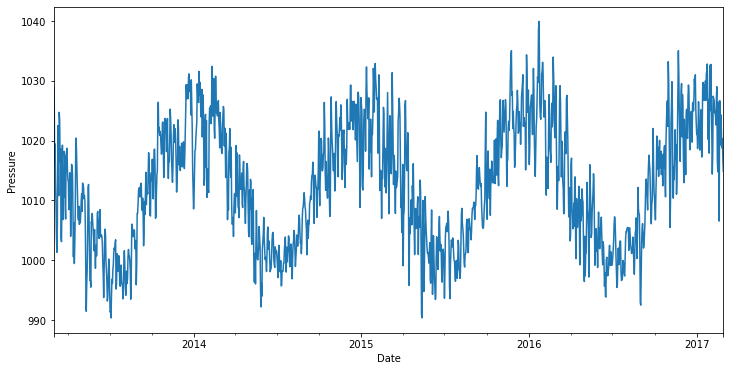

In [57]:
# Visualize the data
pres.plot(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.show()

In [58]:
df_train, df_test = train_test_split(data,test_size=0.1,shuffle=False)

In [59]:
df_train['p_lag1']=df_train['PRES'].tshift(1)
df_train

,PRES,p_lag1
datetime,,
2013-03-01,1028.78,NaN
2013-03-02,1028.85,1028.78
2013-03-03,1016.46,1028.85
2013-03-04,1019.45,1016.46
2013-03-05,1012.70,1019.45
...,...,...
2016-09-30,1011.28,1015.47
2016-10-01,1010.48,1011.28
2016-10-02,1008.65,1010.48


In [60]:
df_train['p_forward1']=df_train['PRES'].tshift(-1)
df_train

,PRES,p_lag1,p_forward1
datetime,,,
2013-03-01,1028.78,NaN,1028.85
2013-03-02,1028.85,1028.78,1016.46
2013-03-03,1016.46,1028.85,1019.45
2013-03-04,1019.45,1016.46,1012.70
2013-03-05,1012.70,1019.45,1009.30
...,...,...,...
2016-09-30,1011.28,1015.47,1010.48
2016-10-01,1010.48,1011.28,1008.65
2016-10-02,1008.65,1010.48,1006.76


In [61]:
df_train['p_ma2']=df_train['PRES'].rolling(2).mean()
df_train

,PRES,p_lag1,p_forward1,p_ma2
datetime,,,,
2013-03-01,1028.78,NaN,1028.85,NaN
2013-03-02,1028.85,1028.78,1016.46,1028.815
2013-03-03,1016.46,1028.85,1019.45,1022.655
2013-03-04,1019.45,1016.46,1012.70,1017.955
2013-03-05,1012.70,1019.45,1009.30,1016.075
...,...,...,...,...
2016-09-30,1011.28,1015.47,1010.48,1013.375
2016-10-01,1010.48,1011.28,1008.65,1010.880
2016-10-02,1008.65,1010.48,1006.76,1009.565


In [62]:
df_train.isna().sum()

PRES          0
p_lag1        1
p_forward1    1
p_ma2         1
dtype: int64

In [63]:
# Decompose the time series into trend, seasonality and residuals
decomp = sm.tsa.seasonal_decompose(pres,model='multiplicative')

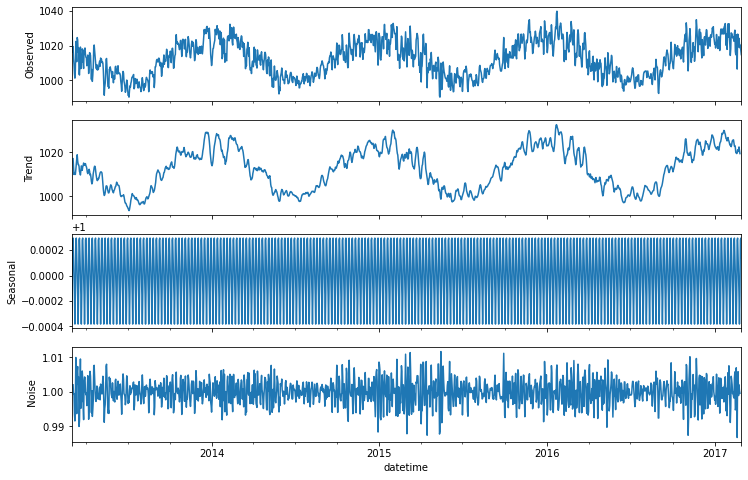

In [64]:
# Visualize the decomposition
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,8))
decomp.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
decomp.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomp.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomp.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel(' Noise')
plt.show()

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

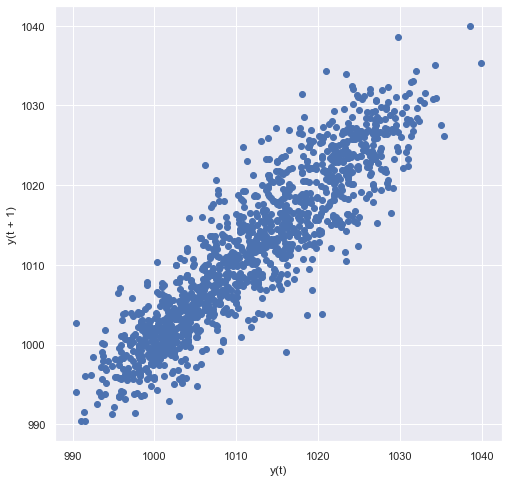

In [65]:
sns.set(rc={'figure.figsize':(8,8)})
pd.plotting.lag_plot(df_train['PRES'])

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

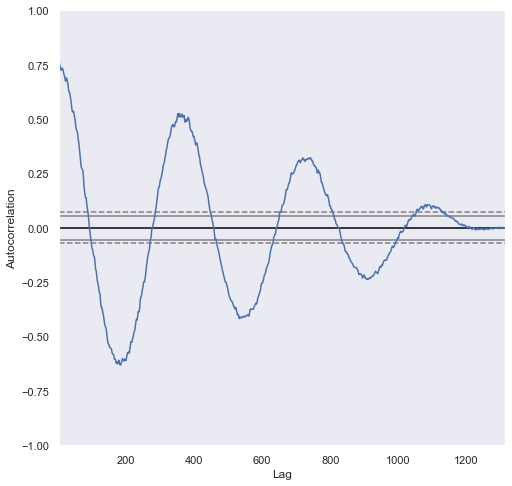

In [66]:
pd.plotting.autocorrelation_plot(df_train['PRES'])

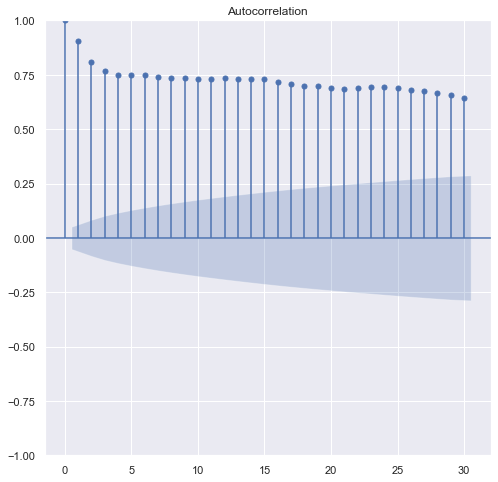

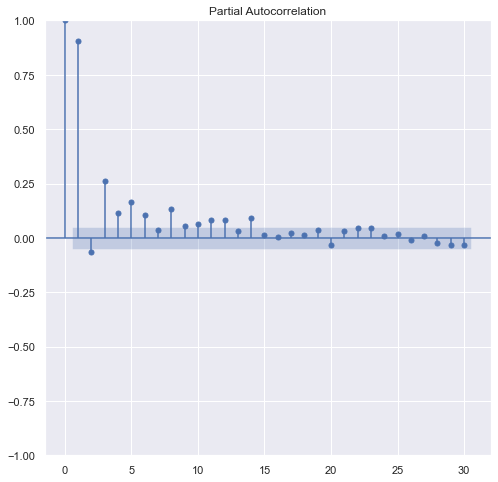

In [67]:
# Calculate the autocorrelation and partial autocorrelation functions
acf = sm.graphics.tsa.plot_acf(pres, lags=30)
pacf = sm.graphics.tsa.plot_pacf(pres, lags=30)

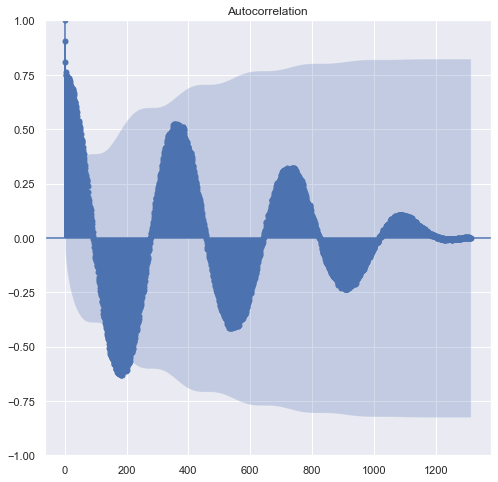

In [68]:
sm.graphics.tsa.plot_acf(df_train['PRES'],lags=len(df_train['PRES']) - 1)
plt.show()

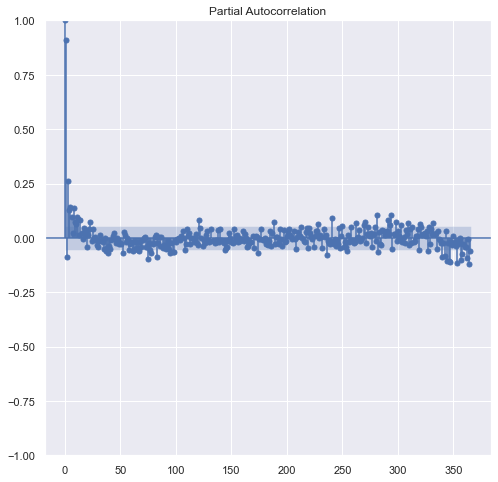

In [69]:
sm.graphics.tsa.plot_pacf(df_train['PRES'],lags=365)
plt.show()

In [70]:
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(df_train['PRES'],lags=1,trend='t',seasonal=True,period=365,exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   PRES   No. Observations:                 1314
Model:               Seas. AutoReg(1)   Log Likelihood               -3413.112
Method:               Conditional MLE   S.D. of innovations              3.256
Date:                Sun, 19 Feb 2023   AIC                           7562.224
Time:                        23:44:24   BIC                           9468.490
Sample:                    03-02-2013   HQIC                          8277.108
                         - 10-04-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend          0.0003      0.000      1.315      0.188      -0.000       0.001
s(1,365)     356.2199     21.521     16.552      0.000     314.040     398.400
s(2,365)     353.4121     21.503     16.435      0.000     311.267     395.558
s(3,365)     354.2732     21.405     16.551      0.000     312.320     396.227
s(4,365)     357.8229     21.360     16.752      0.000     315.959     399.687
s(5,365)     355.8958     21.404     16.628      0.000     313.945     397.847
s(6,365)     354.6081     21.393     16.576      0.000     312.679     396.537
s(7,365)     353.5336     21.358     16.552      0.000     311.672     395.395
s(8,365)     354.6791     21.314     16.641      0.000     312.905     396.453
s(9,365)     362.3455     21.308     17.005      0.000     320.582     404.109
s(10,365)    360.2735     21.465     16.784      0.000     318.202     402.345
s(11,365)    352.8686     21.524     16.394      0.000     310.682     395.055
s(12,365)    353.9423     21.407     16.534      0.000     311.985     395.900
s(13,365)    357.7983     21.354     16.756      0.000     315.945     399.651
s(14,365)    356.3898     21.400     16.654      0.000     314.447     398.333
s(15,365)    351.4765     21.400     16.424      0.000     309.533     393.420
s(16,365)    353.7657     21.298     16.610      0.000     312.023     395.509
s(17,365)    351.4945     21.279     16.518      0.000     309.788     393.201
s(18,365)    353.8281     21.220     16.675      0.000     312.238     395.418
s(19,365)    355.7433     21.230     16.757      0.000     314.134     397.353
s(20,365)    359.9278     21.276     16.917      0.000     318.227     401.628
s(21,365)    352.6470     21.394     16.484      0.000     310.716     394.578
s(22,365)    357.6843     21.318     16.778      0.000     315.901     399.467
s(23,365)    356.7290     21.374     16.690      0.000     314.836     398.622
s(24,365)    358.7328     21.391     16.770      0.000     316.808     400.658
s(25,365)    355.9013     21.443     16.597      0.000     313.873     397.930
s(26,365)    353.3351     21.418     16.497      0.000     311.356     395.314
s(27,365)    352.1396     21.348     16.495      0.000     310.297     393.982
s(28,365)    352.8228     21.278     16.582      0.000     311.119     394.527
s(29,365)    353.7581     21.247     16.650      0.000     312.116     395.401
s(30,365)    354.2329     21.246     16.673      0.000     312.592     395.874
s(31,365)    354.7317     21.255     16.689      0.000     313.073     396.391
s(32,365)    352.0805     21.272     16.552      0.000     310.389     393.772
s(33,365)    350.1893     21.227     16.497      0.000     308.586     391.793
s(34,365)    358.2457     21.158     16.932      0.000     316.776     399.715
s(35,365)    353.2947     21.282     16.601      0.000     311.583     395.007
s(36,365)    355.9918     21.259     16.745      0.000     314.325     397.659
s(37,365)    355.9606     21.300     16.711      0.000     314.212     397.709
s(

In [71]:
pred=result.predict(start='03-31-2013',end='2016-10-04')

In [72]:
df_train['pred_PRES']=pred
df_train

,PRES,p_lag1,p_forward1,p_ma2,pred_PRES
datetime,,,,,
2013-03-01,1028.78,NaN,1028.85,NaN,NaN
2013-03-02,1028.85,1028.78,1016.46,1028.815,NaN
2013-03-03,1016.46,1028.85,1019.45,1022.655,NaN
2013-03-04,1019.45,1016.46,1012.70,1017.955,NaN
2013-03-05,1012.70,1019.45,1009.30,1016.075,NaN
...,...,...,...,...,...
2016-09-30,1011.28,1015.47,1010.48,1013.375,1010.594592
2016-10-01,1010.48,1011.28,1008.65,1010.880,1011.032707
2016-10-02,1008.65,1010.48,1006.76,1009.565,1012.869247


In [73]:
df_train1=df_train.iloc[365:].copy()
df_train1

,PRES,p_lag1,p_forward1,p_ma2,pred_PRES
datetime,,,,,
2014-03-01,1019.17,1022.26,1018.30,1020.715,1020.699472
2014-03-02,1018.30,1019.17,1017.88,1018.735,1015.883817
2014-03-03,1017.88,1018.30,1022.23,1018.090,1016.179799
2014-03-04,1022.23,1017.88,1024.32,1020.055,1019.456868
2014-03-05,1024.32,1022.23,1025.73,1023.275,1020.357139
...,...,...,...,...,...
2016-09-30,1011.28,1015.47,1010.48,1013.375,1010.594592
2016-10-01,1010.48,1011.28,1008.65,1010.880,1011.032707
2016-10-02,1008.65,1010.48,1006.76,1009.565,1012.869247


In [74]:
print('MAPE:', mean_absolute_percentage_error(df_train1['PRES'],df_train1['pred_PRES']))

MAPE: 0.002467828238972506


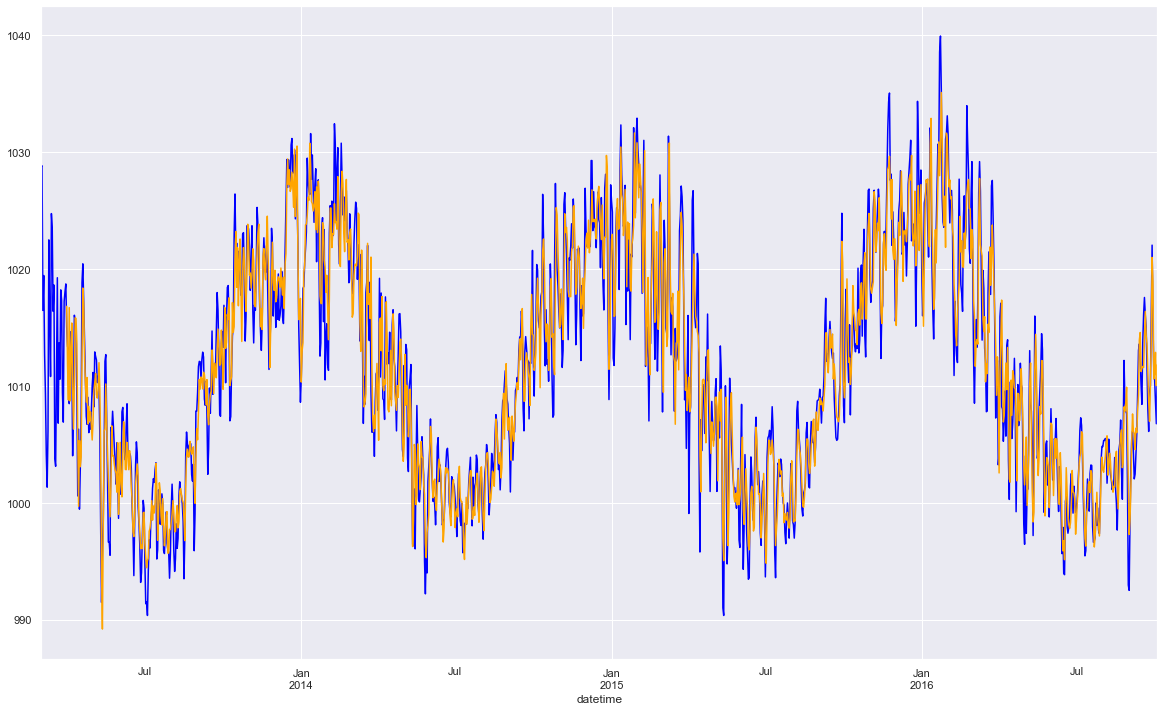

In [75]:
sns.set(rc={'figure.figsize':(20,12)})

df_train['PRES'].plot(color='blue')
df_train['pred_PRES'].plot(color='orange')
plt.show()

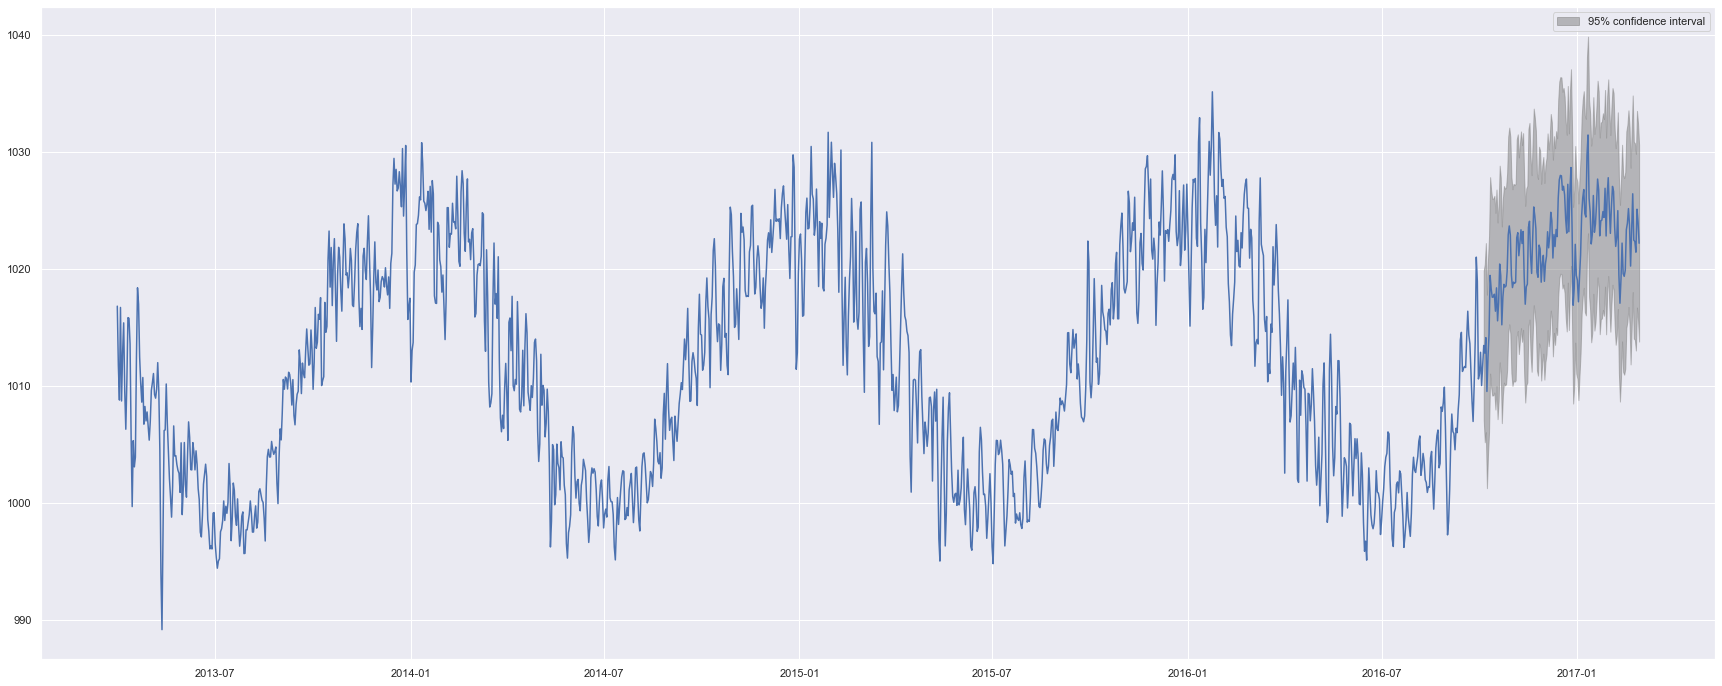

In [76]:
sns.set(rc={'figure.figsize':(30,12)})
result.plot_predict('2013-03-31','2017-02-28')
plt.show()

In [77]:
pred=result.predict(start='03-31-2013',end='2017-02-28')
df_test['pred_PRES']=pred
df_test

,PRES,pred_PRES
datetime,,
2016-10-05,1014.31,1013.452201
2016-10-06,1020.78,1012.797402
2016-10-07,1015.28,1014.122134
2016-10-08,1018.00,1009.527280
2016-10-09,1018.90,1012.451561
...,...,...
2017-02-24,1021.01,1022.336321
2017-02-25,1018.81,1021.419654
2017-02-26,1020.34,1025.089654


In [78]:
print('MAPE:', mean_absolute_percentage_error(df_test['PRES'],df_test['pred_PRES']))

MAPE: 0.0046799179503012305


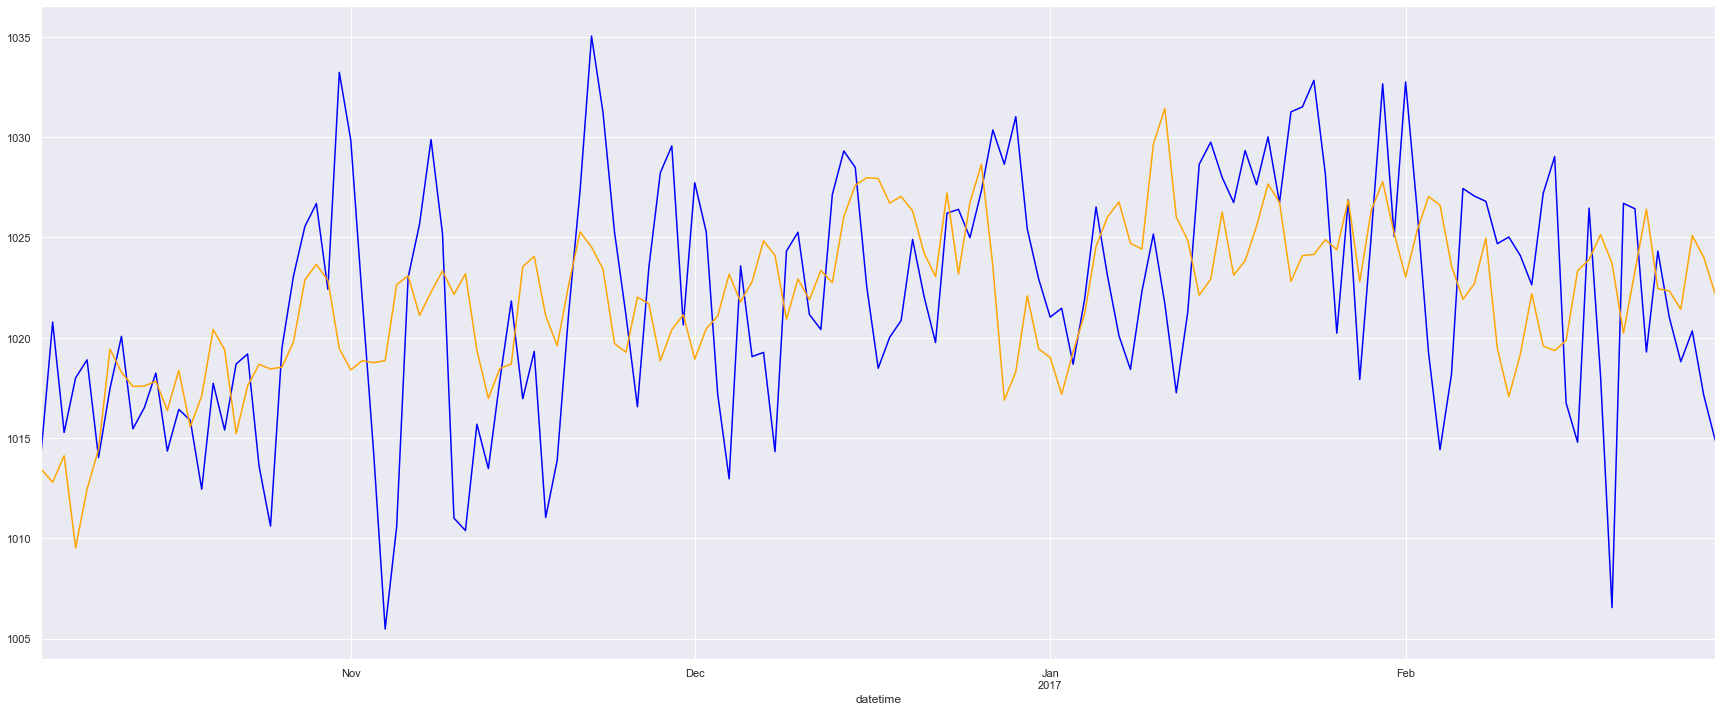

In [79]:
df_test['PRES'].plot(color='blue')
df_test['pred_PRES'].plot(color='orange')
plt.show()

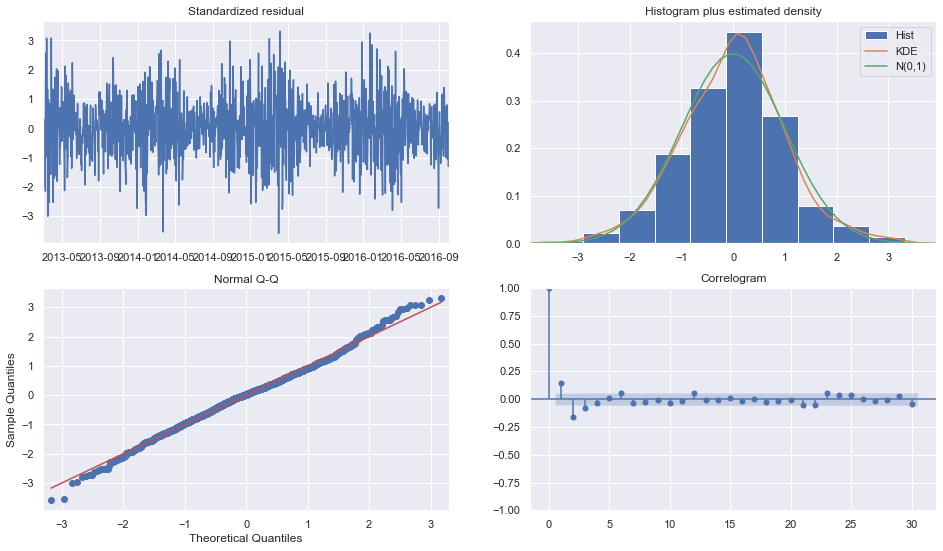

In [80]:
result.plot_diagnostics(figsize=(16,9),lags=30)
plt.show()

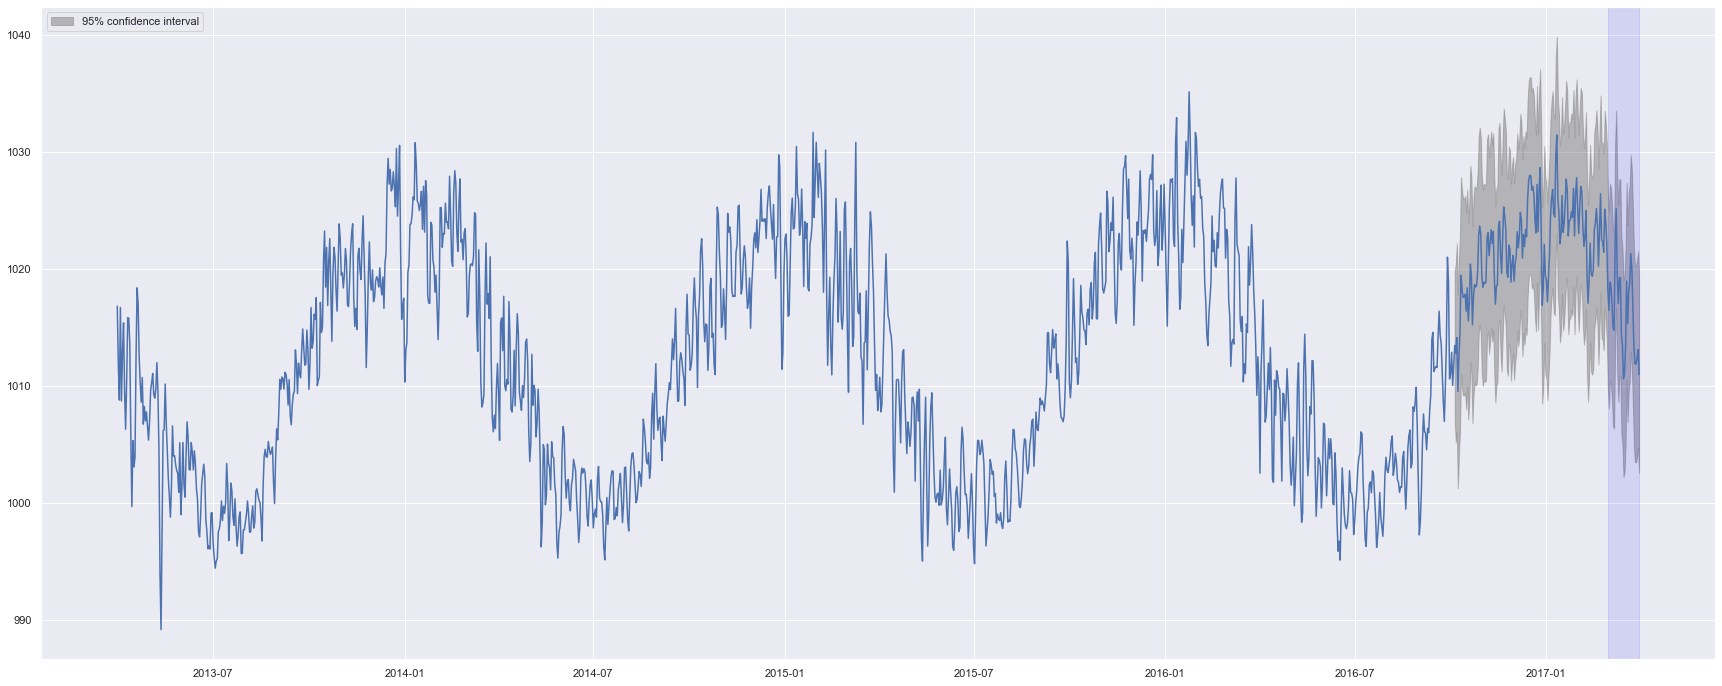

In [81]:
pred_long=result.predict(start='03-31-2013',end='2017-03-31')
sns.set(rc={'figure.figsize':(30,12)})
result.plot_predict('03-31-2013','2017-03-31')
plt.axvspan('2017-03-01','2017-03-31', color="blue", alpha=0.1)
plt.show()

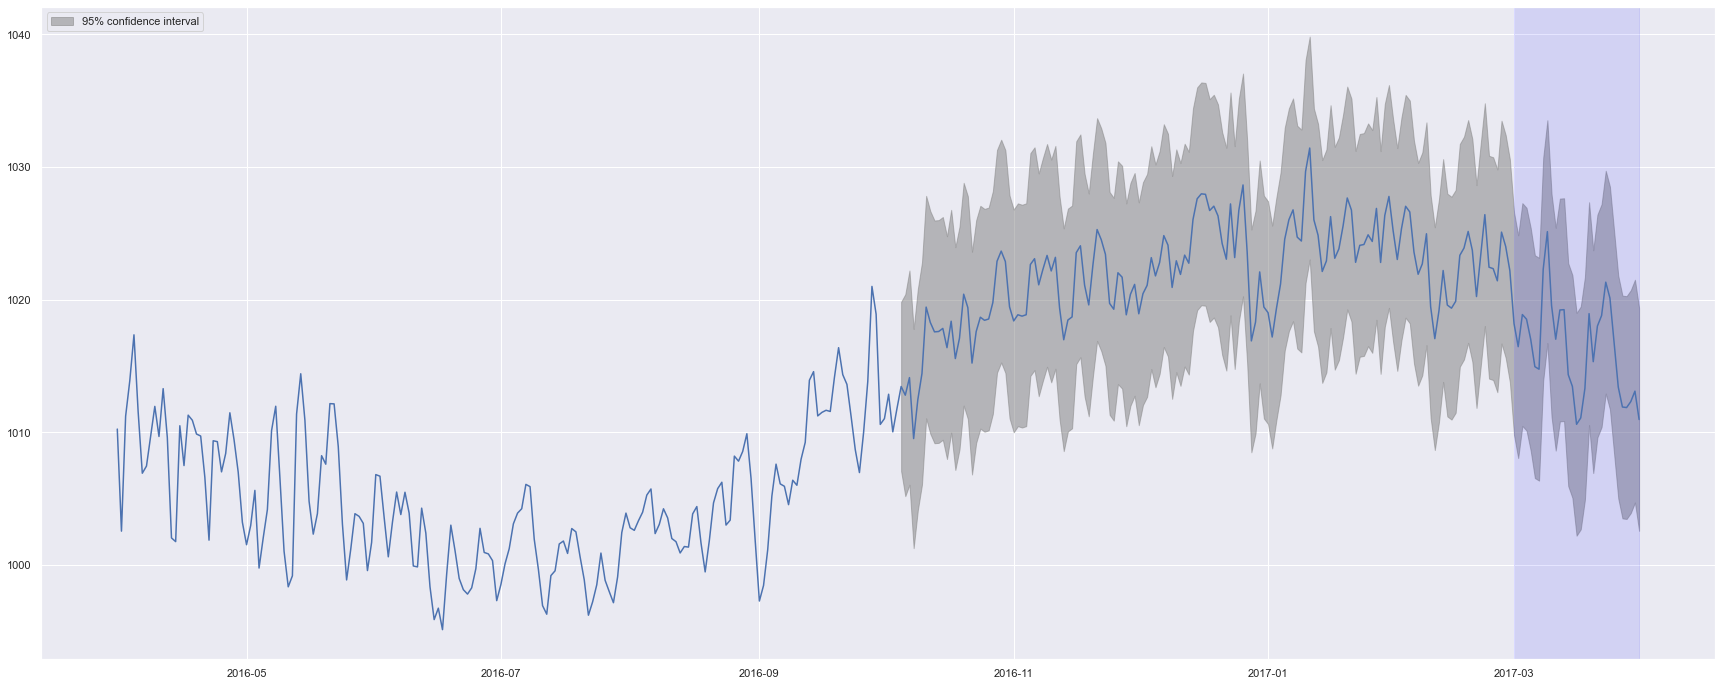

In [82]:
pred_long=result.predict(start='2016-03-31',end='2017-03-31')
sns.set(rc={'figure.figsize':(30,12)})
result.plot_predict('2016-03-31','2017-03-31')
plt.axvspan('2017-03-01','2017-03-31', color="blue", alpha=0.1)
plt.show()

In [83]:
df_test_shifted=df_test[['PRES']].copy()

In [84]:
training_window=120
train_ts=df_train['PRES']
test_ts=df_test_shifted
history=[x for x in train_ts]

In [85]:
history=history[(-training_window):]

In [86]:
prediction=list()

In [87]:
for t in range(len(test_ts)):
    model=AutoReg(history,lags=1,trend='t',seasonal=True,period=7,exog=None,missing='drop')
    model_fit=model.fit()
    yhat=model_fit.predict(start=len(history)+1,end=len(history)+1)
    prediction.append(yhat[0])
    obs=list(test_ts.iloc[t])
    # move the training window
    history.append(obs[0])
    history.pop(0)
df_test_shifted['yhat']=prediction

In [88]:
df_test_shifted

,PRES,yhat
datetime,,
2016-10-05,1014.31,1009.603521
2016-10-06,1020.78,1012.603426
2016-10-07,1015.28,1018.612143
2016-10-08,1018.00,1015.617299
2016-10-09,1018.90,1016.937813
...,...,...
2017-02-24,1021.01,1022.370650
2017-02-25,1018.81,1022.341602
2017-02-26,1020.34,1027.420769


In [89]:
mean_absolute_percentage_error(df_test_shifted['PRES'],df_test_shifted['yhat'])

0.0041214461047044655

In [90]:
df_train['p_d1']=df_train['PRES']-df_train['p_lag1']
df_train

,PRES,p_lag1,p_forward1,p_ma2,pred_PRES,p_d1
datetime,,,,,,
2013-03-01,1028.78,NaN,1028.85,NaN,NaN,NaN
2013-03-02,1028.85,1028.78,1016.46,1028.815,NaN,0.07
2013-03-03,1016.46,1028.85,1019.45,1022.655,NaN,-12.39
2013-03-04,1019.45,1016.46,1012.70,1017.955,NaN,2.99
2013-03-05,1012.70,1019.45,1009.30,1016.075,NaN,-6.75
...,...,...,...,...,...,...
2016-09-30,1011.28,1015.47,1010.48,1013.375,1010.594592,-4.19
2016-10-01,1010.48,1011.28,1008.65,1010.880,1011.032707,-0.80
2016-10-02,1008.65,1010.48,1006.76,1009.565,1012.869247,-1.83


In [91]:
sm.tsa.statespace.tools.diff(df_train['PRES'],k_diff=1,k_seasonal_diff=None, seasonal_periods=7)

datetime
2013-03-02     0.07
2013-03-03   -12.39
2013-03-04     2.99
2013-03-05    -6.75
2013-03-06    -3.40
              ...  
2016-09-30    -4.19
2016-10-01    -0.80
2016-10-02    -1.83
2016-10-03    -1.89
2016-10-04     4.40
Freq: D, Name: PRES, Length: 1313, dtype: float64

<AxesSubplot: xlabel='datetime'>

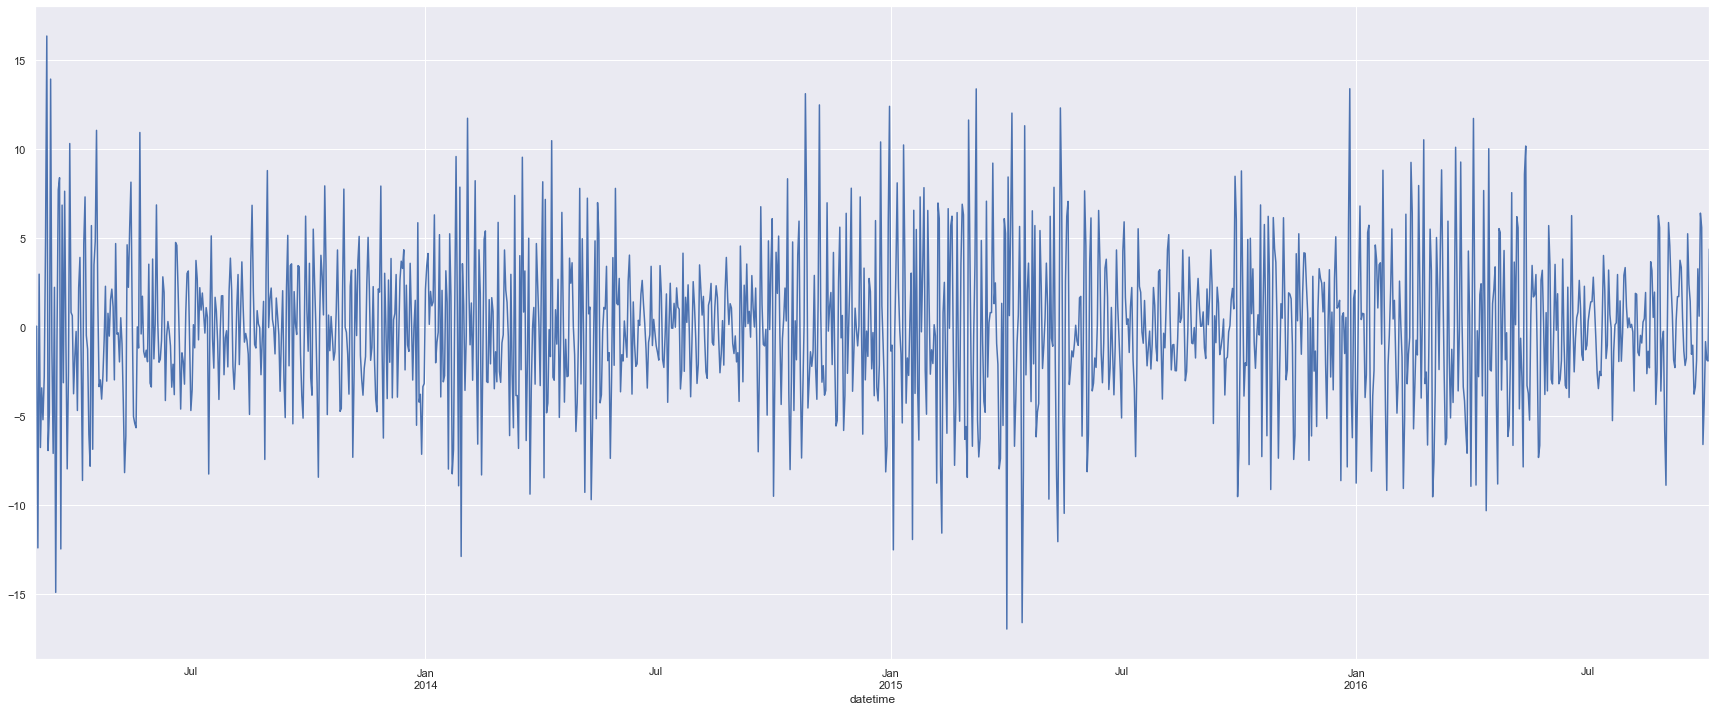

In [92]:
df_train['p_d1'].plot()

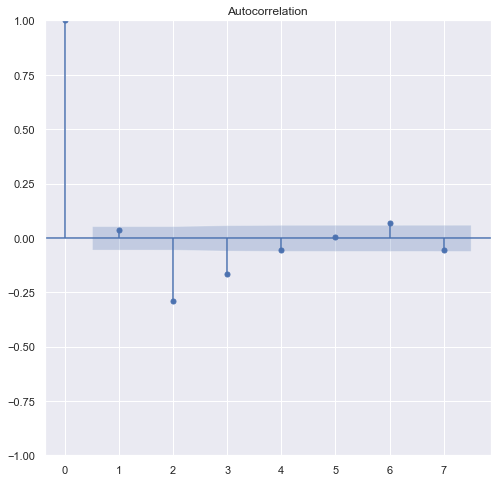

In [93]:
sns.set(rc={'figure.figsize':(8,8)})
sm.graphics.tsa.plot_acf(df_train['p_d1'][1:],lags=7)
plt.show()

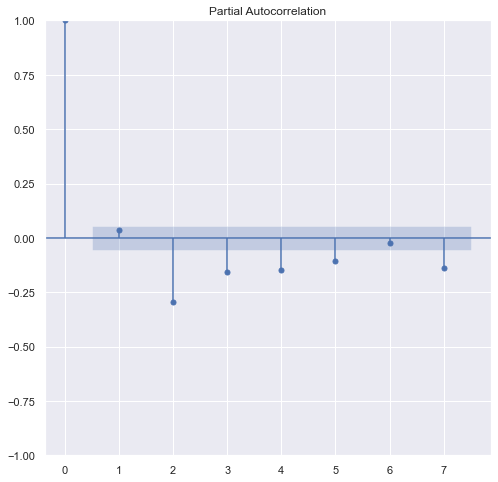

In [94]:
sns.set(rc={'figure.figsize':(8,8)})
sm.graphics.tsa.plot_pacf(df_train['p_d1'][1:],lags=7)
plt.show()

In [95]:
# Apply ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df_train['PRES'],order=(1,1,1),trend=None,seasonal_order=(1,1,0,30),exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              PRES   No. Observations:                 1314
Model:             ARIMA(1, 1, 1)x(1, 1, [], 30)   Log Likelihood               -3828.399
Date:                           Sun, 19 Feb 2023   AIC                           7664.797
Time:                                   23:44:32   BIC                           7685.425
Sample:                               03-01-2013   HQIC                          7672.542
                                    - 10-04-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6412      0.026     24.345      0.000       0.590       0.693
ma.L1         -0.9395      0.013    -73.762      0.000      -0.964      -0.915
ar.S.L30      -0.5173      0.022    -23.334      0.000      -0.561      -0.474
sigma2        22.6910      0.788     28.789      0.000      21.146      24.236
===================================================================================
Ljung-Box (L1) (Q):                  37.60   Jarque-Bera (JB):                36.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.18
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df_train['PRES'],order=(4,1,3),trend=None,seasonal_order=(0,1,0,7),exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                             PRES   No. Observations:                 1314
Model:             ARIMA(4, 1, 3)x(0, 1, [], 7)   Log Likelihood               -3921.305
Date:                          Sun, 19 Feb 2023   AIC                           7858.610
Time:                                  23:44:34   BIC                           7900.008
Sample:                              03-01-2013   HQIC                          7874.139
                                   - 10-04-2016                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7851      0.024    -32.449      0.000      -0.832      -0.738
ar.L2          0.1702      0.032      5.331      0.000       0.108       0.233
ar.L3          0.2485      0.031      8.076      0.000       0.188       0.309
ar.L4         -0.0064      0.024     -0.262      0.793      -0.054       0.041
ma.L1          0.8028    257.230      0.003      0.998    -503.358     504.964
ma.L2         -0.8031    463.751     -0.002      0.999    -909.738     908.132
ma.L3         -0.9997    257.175     -0.004      0.997    -505.053     503.053
sigma2        23.4488   6032.130      0.004      0.997   -1.18e+04    1.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                93.48
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.01
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['PRES'],order=(5,1,3),trend=None,seasonal_order=(1,1,0,7),exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                             PRES   No. Observations:                 1461
Model:             ARIMA(5, 1, 3)x(1, 1, [], 7)   Log Likelihood               -4232.560
Date:                          Sun, 19 Feb 2023   AIC                           8485.120
Time:                                  23:45:06   BIC                           8537.934
Sample:                              03-01-2013   HQIC                          8504.827
                                   - 02-28-2017                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8842      0.025    -35.797      0.000      -0.933      -0.836
ar.L2          0.1792      0.034      5.215      0.000       0.112       0.247
ar.L3          0.3442      0.030     11.336      0.000       0.285       0.404
ar.L4         -0.0704      0.032     -2.179      0.029      -0.134      -0.007
ar.L5          0.0006      0.025      0.025      0.980      -0.048       0.049
ma.L1          0.8022     90.548      0.009      0.993    -176.668     178.272
ma.L2         -0.8026    163.191     -0.005      0.996    -320.651     319.046
ma.L3         -0.9997     90.520     -0.011      0.991    -178.416     176.417
ar.S.L7       -0.4921      0.021    -23.180      0.000      -0.534      -0.451
sigma2        19.6028   1775.035      0.011      0.991   -3459.401    3498.607
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                54.91
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.10
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['PRES'],order=(2,1,2),trend=None,seasonal_order=(1,1,0,7),exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                             PRES   No. Observations:                 1461
Model:             ARIMA(2, 1, 2)x(1, 1, [], 7)   Log Likelihood               -4308.466
Date:                          Sun, 19 Feb 2023   AIC                           8628.932
Time:                                  23:46:53   BIC                           8660.621
Sample:                              03-01-2013   HQIC                          8640.756
                                   - 02-28-2017                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4155      0.082      5.077      0.000       0.255       0.576
ar.L2          0.0253      0.060      0.420      0.674      -0.093       0.143
ma.L1         -0.5976      0.213     -2.804      0.005      -1.015      -0.180
ma.L2         -0.4024      0.115     -3.496      0.000      -0.628      -0.177
ar.S.L7       -0.5383      0.019    -28.860      0.000      -0.575      -0.502
sigma2        21.8929      4.480      4.887      0.000      13.113      30.673
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                52.79
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.10
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['PRES'],order=(4,1,3),trend=None,seasonal_order=(1,1,0,7),exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                             PRES   No. Observations:                 1461
Model:             ARIMA(4, 1, 3)x(1, 1, [], 7)   Log Likelihood               -4232.636
Date:                          Sun, 19 Feb 2023   AIC                           8483.272
Time:                                  23:47:06   BIC                           8530.805
Sample:                              03-01-2013   HQIC                          8501.008
                                   - 02-28-2017                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8830      0.025    -35.764      0.000      -0.931      -0.835
ar.L2          0.1805      0.033      5.432      0.000       0.115       0.246
ar.L3          0.3445      0.030     11.385      0.000       0.285       0.404
ar.L4         -0.0717      0.024     -3.049      0.002      -0.118      -0.026
ma.L1          0.8015      0.398      2.014      0.044       0.022       1.581
ma.L2         -0.8026      0.717     -1.119      0.263      -2.208       0.603
ma.L3         -0.9988      0.398     -2.507      0.012      -1.780      -0.218
ar.S.L7       -0.4929      0.020    -24.069      0.000      -0.533      -0.453
sigma2        19.5942      7.825      2.504      0.012       4.257      34.931
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                54.79
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.10
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
pred=result.predict(start='2013-03-31',end='2017-03-31')
df_test['pred_arima']=pred
df_test

,PRES,pred_PRES,pred_arima
datetime,,,
2016-10-05,1014.31,1013.452201,1015.328768
2016-10-06,1020.78,1012.797402,1011.667097
2016-10-07,1015.28,1014.122134,1016.433275
2016-10-08,1018.00,1009.527280,1010.512837
2016-10-09,1018.90,1012.451561,1016.607167
...,...,...,...
2017-02-24,1021.01,1022.336321,1029.368610
2017-02-25,1018.81,1021.419654,1013.609534
2017-02-26,1020.34,1025.089654,1018.433226


In [104]:
print('MAPE:', mean_absolute_percentage_error(df_test['PRES'],df_test['pred_arima']))

MAPE: 0.003959206046158243


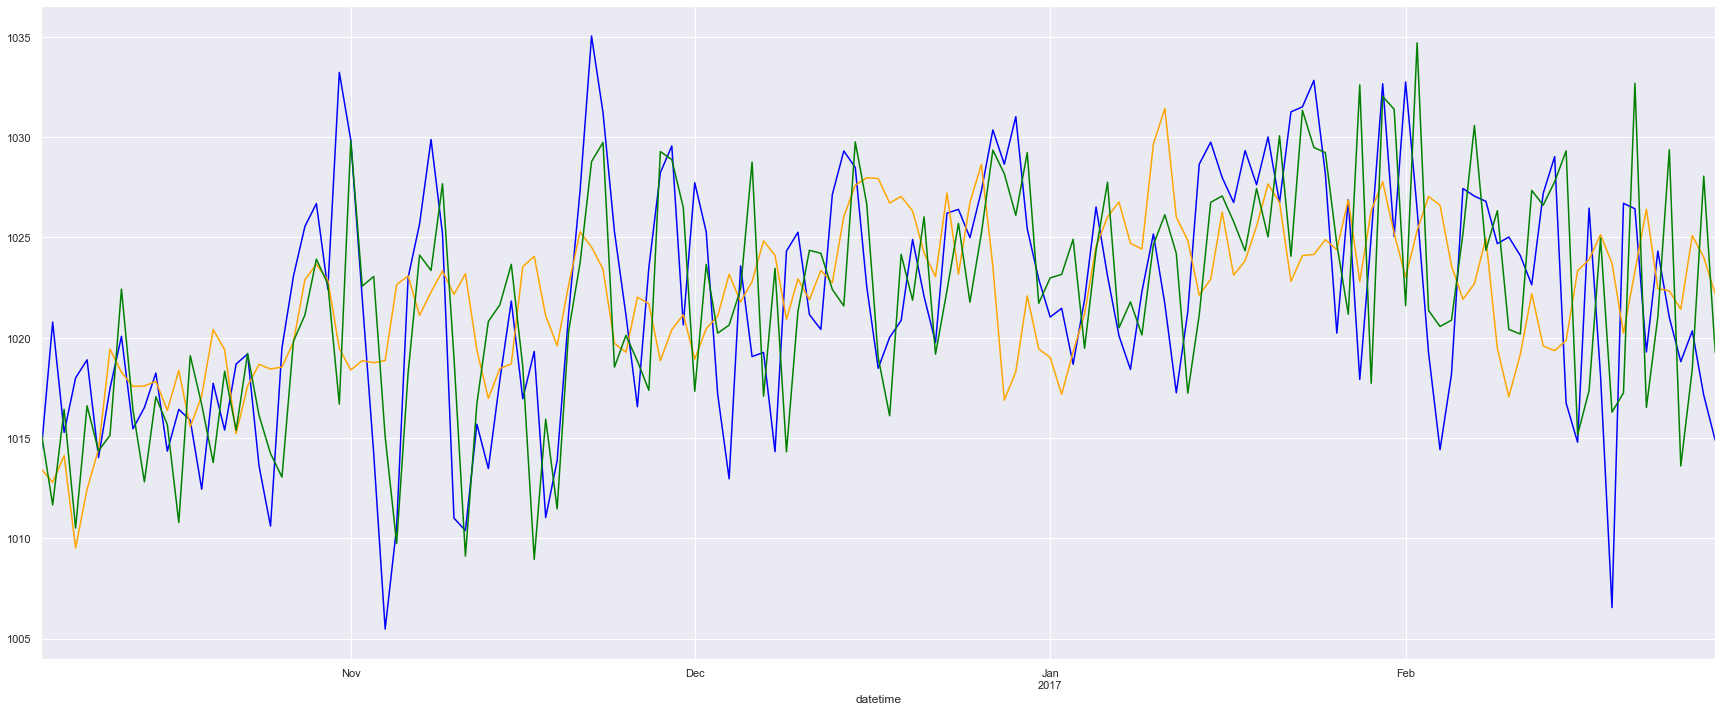

In [105]:
sns.set(rc={'figure.figsize':(30,12)})
df_test['PRES'].plot(color='blue')
df_test['pred_PRES'].plot(color='orange')
df_test['pred_arima'].plot(color='green')
plt.show()

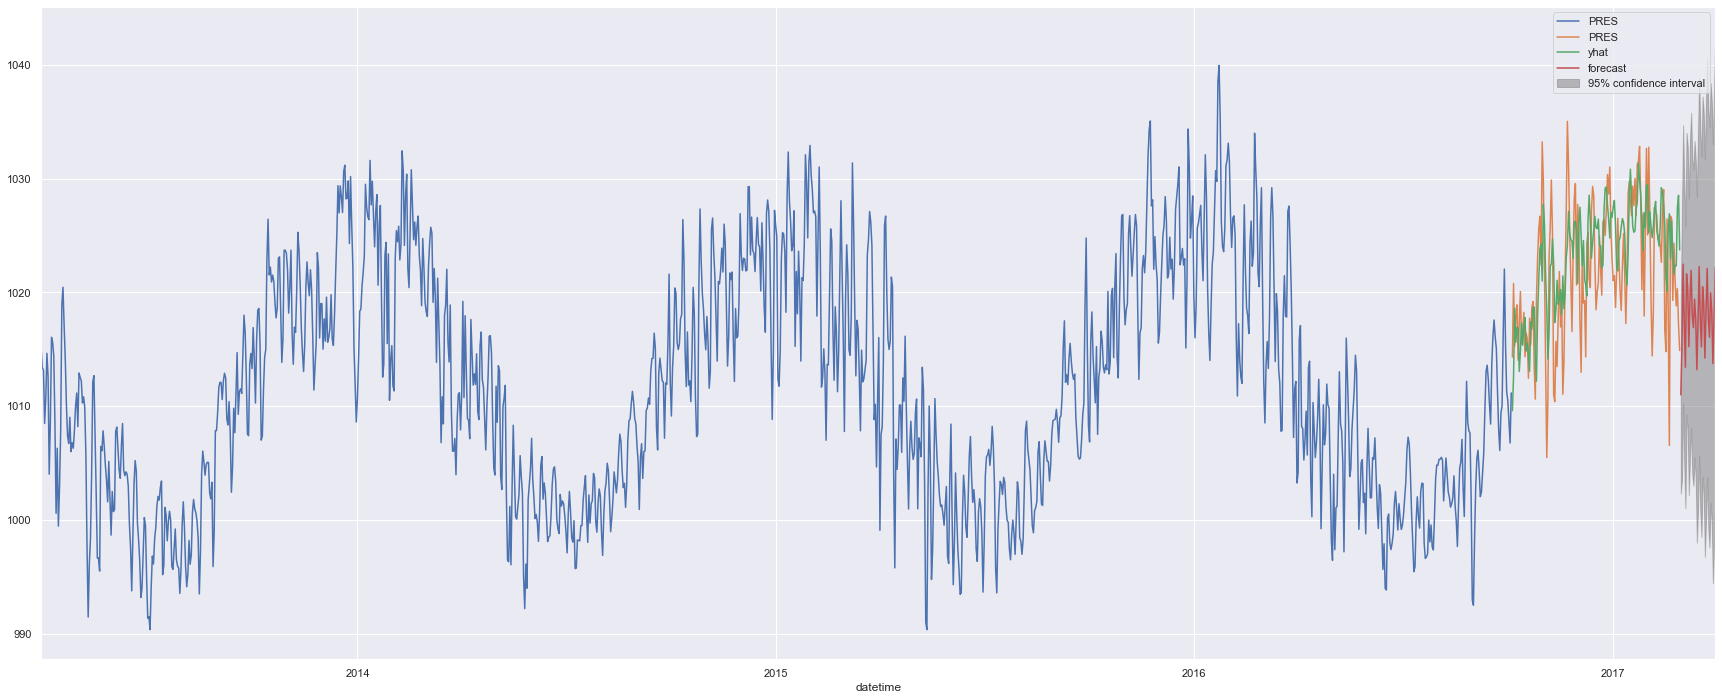

In [106]:
from statsmodels.graphics.tsaplots import plot_predict

sns.set(rc={'figure.figsize':(30,12)})
# result.plot_predict('01-03-2017','31-03-2017')
fig, ax = plt.subplots()

ax = train_ts.loc['03-31-2013':].plot(ax=ax)
ax = test_ts.loc['2016-10-05':].plot(ax=ax)
plot_predict(result, '2017-03-01','2017-03-31', ax=ax)

plt.show()

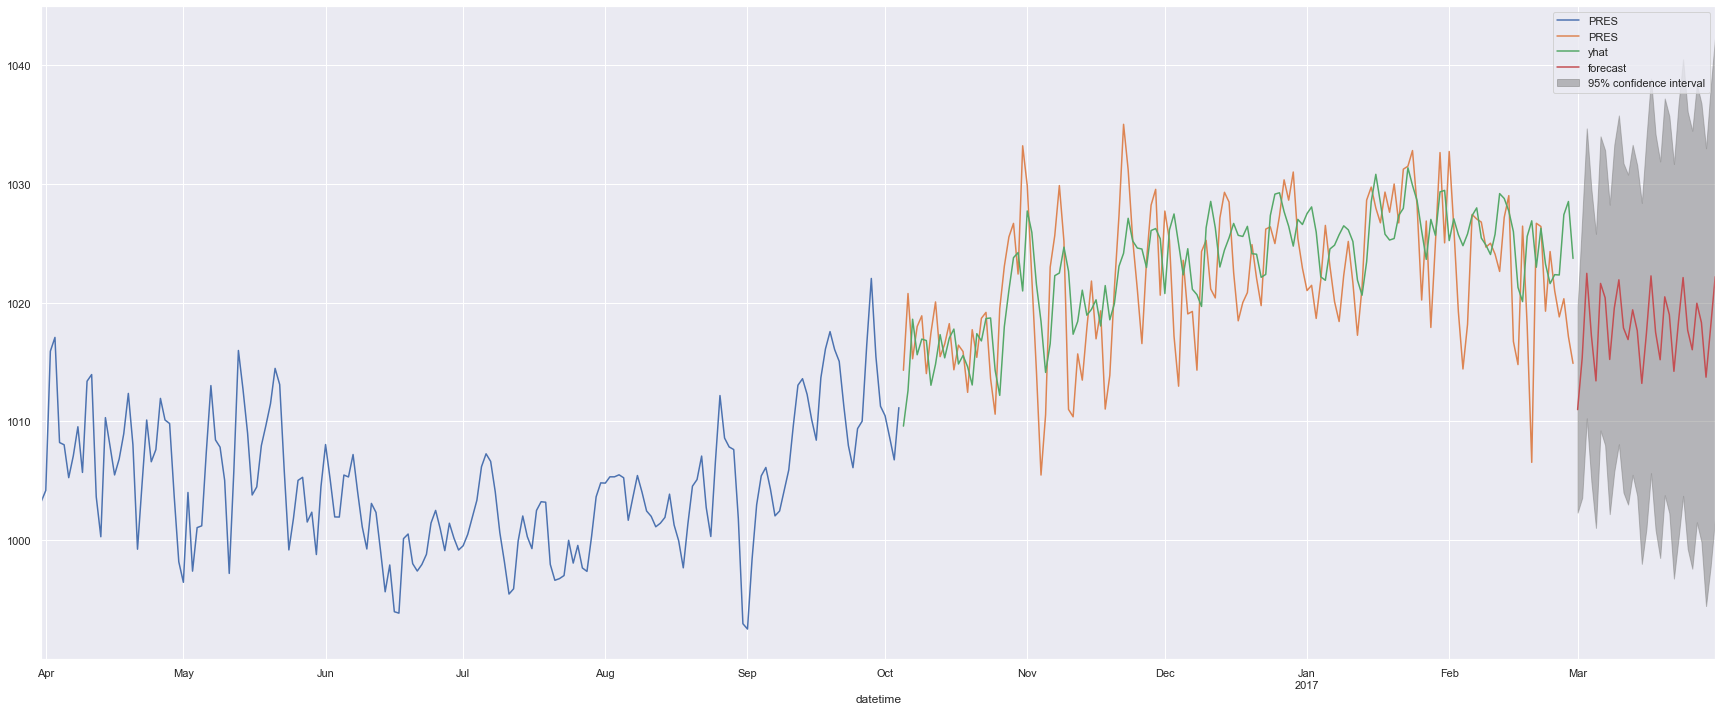

In [107]:
from statsmodels.graphics.tsaplots import plot_predict

sns.set(rc={'figure.figsize':(30,12)})
# result.plot_predict('01-03-2017','31-03-2017')
fig, ax = plt.subplots()

ax = train_ts.loc['03-31-2016':].plot(ax=ax)
ax = test_ts.loc['2016-10-05':].plot(ax=ax)
plot_predict(result, '2017-03-01','2017-03-31', ax=ax)

plt.show()